# License
***
Copyright (C) 2025 J. Patrick Hall, jphall@gwu.edu and N M Emran Hussain (nmemran.hussain@gwu.edu)

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# MNIST Data

1. Imports

In [1]:
import numpy as np
import tensorflow as tf
import random as python_random

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

2. Try for reproducibility

In [2]:
!PYTHONHASHSEED=0

In [3]:
SEED = 309
np.random.seed(SEED)
python_random.seed(SEED)
tf.random.set_seed(SEED)

3. Load and format MNIST data

In [4]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape to (28, 28, 1) and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_train.shape[1]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


4. Examine data
* Non-zero pixels indicate the hand-drawn image

In [5]:
for i in range(0, 28):
  print(np.array2string(x_train[0][i], max_line_width=np.inf, precision=2, separator=' ').replace('\n', '').replace('[0.]', '[0.00]').replace('[0.  ]', '[0.00]'))

print()
print(y_train[0])

[[0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00]]
[[0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00]]
[[0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00]]
[[0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00]]
[[0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00] [0.00]]
[[0.00] [0

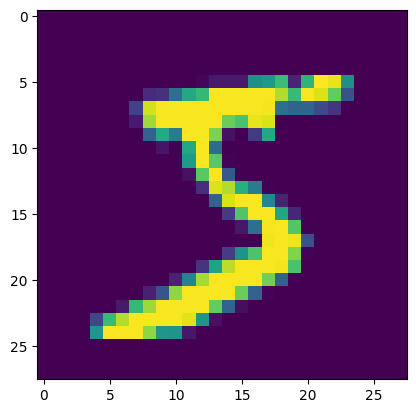

In [6]:
import matplotlib.pyplot as plt
_ = plt.imshow(x_train[0][:,:,])

# Build Model

5. Define a smaller version of Lenet-5 that uses the standard 28x28 MNIST images

In [7]:
model = Sequential([

    # Input
    Input(shape=(28, 28, 1)),

    # C1
    # 1 image in, 6 feature maps out (1 image represented *in each of* the 6 feature maps)
    # 28 x 28 x 1 inputs
    # 1 image goes into 6 filters with (1 x 2 x 2 + 1) = 5 weights for 30 total weights in C1 layer
    # resulting in ((28 - 2 + 0)/1) + 1 = 27 x 27 x 6 output volume
    Conv2D(filters=6, kernel_size=(2, 2), activation='sigmoid'), # REQUIRES STUDENT INPUT

    # S2
    # 6 feature maps in, 6 activation maps out
    # 27 x 27 x 6 input volume
    # goes into 0 weights in S2 layer
    # pooling implies kernel size 4, stride 2 and padding of 0.5 b/c of odd input size
    # resulting in a ((27 - 4 + 1)/2) + 1 = 13 x 13 x 6 output volume
    MaxPooling2D(pool_size=2),

    # C3
    # 6 activation maps in, 16 feature maps out (6 activation maps represented *in each of* the 16 feature maps)
    # 13 x 13 x 6 input volume
    # 6 activation maps go into 16 filters with (6 x 5 x 5 + 1) = 151 weights for a total of 2416 weights in C3 layer
    # resulting in ((13 - 5 + 0)/1) + 1 = 9 x 9 x 16 output volume
    Conv2D(filters=16, kernel_size=(5, 5), activation='sigmoid'), # REQUIRES STUDENT INPUT

    # S4
    # 16 feature maps in, 16 activation maps out
    # 9 x 9 x 16 input volume
    # goes into 0 weights in S2 layer
    # pooling implies kernel size 4, stride 2 and padding of 0.5 b/c of odd input size
    # resulting in (9 - ? + 1)/2) + 1 = ? x ? x 16 output volume
    MaxPooling2D(pool_size=2),

    # C5
    # 16 activation maps in, 120 feature maps out (16 activation maps represented *in each of* the 120 feature maps)
    # 4 x 4 x 16 input volume
    # 16 activation maps go into 120 filters with (16 x 4 x 4 + 1) = 257 weights for a total of 257 weights in C5 layer
    # resulting in a  (? - ? + 0)/1) + 1 = 1 x 1 x 120 output volume
    Conv2D(filters=120, kernel_size=(4,4), activation='sigmoid'), # REQUIRES STUDENT INPUT

    # F6
    # 120 input elements are flattened and connected to ? weights with biases
    # resulting in a 120 x 84 + 84 = 10,164 weights in F6 and a ? x 1 x 1 output volume
    Flatten(),
    Dense(84, activation='tanh'), # REQUIRES STUDENT INPUT

    # Output
    # each of ? units in F6 feed into 10 softmax output units
    # there are ? x ? + ? = ? weights in the output layer resulting in a ? x 1 x 1 output volume
    # output unit with highest output "probability" is the prediction for the image
    Dense(10, activation='softmax'), # REQUIRES STUDENT INPUT

])

6. View a summary of the model architecture

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 27, 27, 6)      │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 9, 9, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 120)      │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,300 (173.05 KB)

 Trainable params: 44,300 (173.05 KB)

 Non-trainable params: 0 (0.00 B)

7. Precompile model for faster training

In [9]:
model.compile(
    loss='categorical_crossentropy',
    optimizer= 'sgd', # REQUIRES STUDENT INPUT
    metrics=['accuracy']
)

8. Train model

In [10]:
# restart and run notebook for reproducible results
# running this cell multiple times will result in irreproducible results
model.fit(x_train, y_train, epochs=100, batch_size=128, validation_split=0.1)

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.1126 - loss: 2.3178 - val_accuracy: 0.1050 - val_loss: 2.3037
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1120 - loss: 2.3020 - val_accuracy: 0.1050 - val_loss: 2.3036
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1122 - loss: 2.3019 - val_accuracy: 0.1050 - val_loss: 2.3034
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1124 - loss: 2.3017 - val_accuracy: 0.1050 - val_loss: 2.3033
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1125 - loss: 2.3016 - val_accuracy: 0.1050 - val_loss: 2.3032
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1126 - loss: 2.3015 - val_accuracy: 0.1050 - val_loss: 2.3030
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1127 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 2.3028
Epoch 8/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1130 - loss: 2.3012 - val_accu

9. Evaluate model performance on test data

In [11]:
loss, acc = model.evaluate(x_test, y_test, batch_size=128)
print(f"Test accuracy: {acc:.4f}")

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9526 - loss: 0.1482
Test accuracy: 0.9619


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib
import sys

print("Python version:", sys.version)
print("NumPy version:", np.__version__)
print("TensorFlow version:", tf.__version__)
print("Matplotlib version:", matplotlib.__version__)


Python version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
NumPy version: 2.0.2
TensorFlow version: 2.18.0
Matplotlib version: 3.10.0
